<a href="https://colab.research.google.com/github/FGalvao77/Compreendendo-as-funcoes-de-distribuicao-cumulativa-empirica-com-R/blob/main/Compreendendo_as_fun%C3%A7%C3%B5es_de_distribui%C3%A7%C3%A3o_cumulativa_emp%C3%ADrica_com_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Compreendendo as funções de distribuição cumulativa empírica**

- Material referencial traduzido de:
 - https://data.library.virginia.edu/understanding-empirical-cumulative-distribution-functions/

**Utlizaremos o ambiente `Jupyter Notebook`com a `Linguagem R` para nossos estudos**

**Segue abaixo outros links para conhecimento teórico**

- Portal Action:
  - http://www.portalaction.com.br/probabilidades/21-funcao-de-distribuicao-acumulada

- UFPR:
 - https://docs.ufpr.br/~lucambio/CE085/1S2017/ecdf.pdf

- Wikipedia:
 - https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_distribui%C3%A7%C3%A3o_acumulada

`O que são funções de distribuição cumulativa empírica e o que podemos fazer com elas?`

Para responder à primeira pergunta, vamos dar um passo atrás e ter certeza de que entendemos **“distribuições”**, ou mais especificamente, **“distribuições de probabilidade”**.

Uma distribuição de probabilidade básica.

Imagine um evento simples, digamos, jogar uma moeda 3 vezes. Aqui estão todos os resultados possíveis, onde `H = cara` e `T = coroa`:

- HHH
- HHT
- HTH
- THH
- HTT
- TTH
- THT
- TTT

Agora imagine `H = “sucesso”`. Nossos resultados podem ser modificados da seguinte forma:

- HHH (3 sucessos)
- HHT (2 sucessos)
- HTH (2 sucessos)
- THH (2 sucessos)
- HTT (1 sucesso)
- TTH (1 sucesso)
- THT (1 sucesso)
- TTT (0 sucessos)

Uma vez que existem 8 resultados possíveis, `as probabilidades para 0, 1, 2 e 3 sucessos são:`

- 0 sucessos: 1/8
- 1 sucesso: 3/8
- 2 sucessos: 3/8
- 3 sucessos: 1/8

Se somarmos essas probabilidades, obtemos 1. E isso representa a **“distribuição de probabilidade”** para o nosso evento. Formalmente, este evento segue uma distribuição Binomial porque os eventos são independentes, há um número fixo de tentativas (3), a probabilidade é a mesma para cada giro (0,5) e nosso resultado é o número de **"sucessos"** no número de ensaios. 

_Na verdade, o que acabamos de demonstrar é uma distribuição binomial com 3 tentativas e probabilidade igual a 0,5. Às vezes, é abreviado como b (3, 0.5) . Podemos gerar rapidamente as probabilidades em R usando a função `dbinom`:_

In [1]:
# instalando o pacote "dbinom"
install.packages('dbinom')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘dbinom’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [2]:
dbinom(0:3, size = 3, prob = 0.5)
## [1] 0.125 0.375 0.375 0.125

[1] 0.125 0.375 0.375 0.125

Podemos visualizar rapidamente essa distribuição de probabilidade com a função `barplot`:

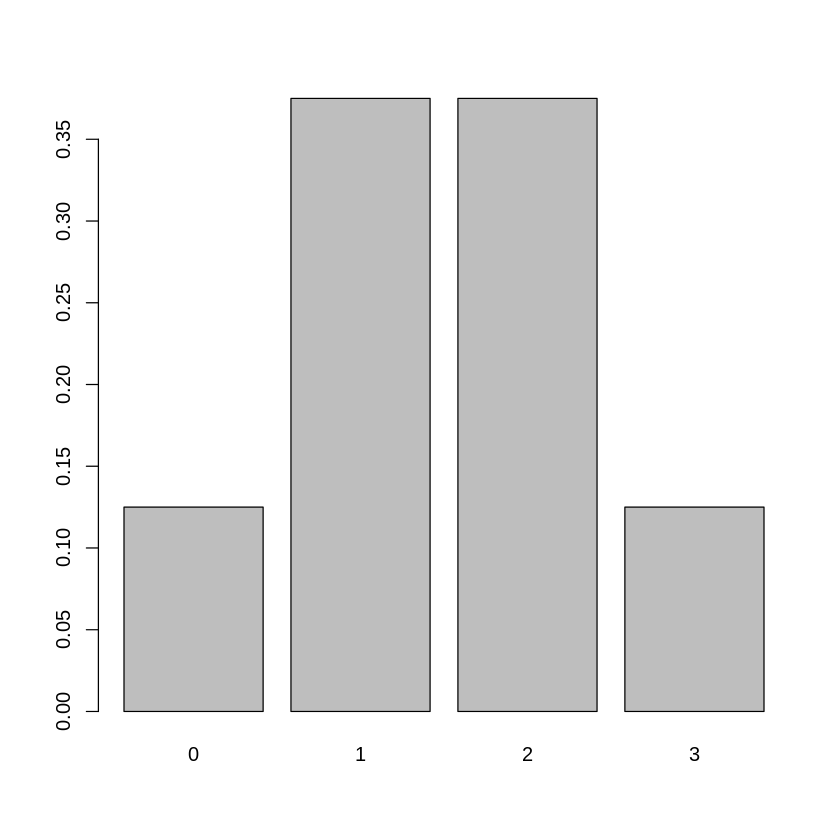

In [7]:
barplot(dbinom(x = 0:3, size = 3, prob = 0.5), names.arg = 0:3)

A função usada para gerar essas probabilidades é freqüentemente chamada de função **“densidade”**, daí o **“d”** na frente do binom. Distribuições que geram probabilidades para valores discretos, como o binomial neste exemplo, às vezes são chamadas de **“funções de massa de probabilidade”** ou `PMFs`. Distribuições que geram probabilidades para valores contínuos, como o Normal, às vezes são chamadas de **“funções de densidade de probabilidade”** ou `PDFs`. Já em R, independente de PMF ou PDF, a função que gera as probabilidades é conhecida como função de **“densidade”**.

**Função de distribuição cumulativa**

Agora vamos falar sobre probabilidades **“cumulativas”**. Essas são probabilidades que se acumulam à medida que nos movemos da esquerda para a direita ao longo do eixo x em nossa distribuição de probabilidade. Olhando para o gráfico de distribuição acima, isso seria:

- P( X≤ 0 ) 
- P( X≤ 1 ) 
- P( X≤ 2 ) 
- P( X≤ 3 ) 

Podemos calcular rapidamente estes:

- P( X≤ 0 ) = 1/8 
- P( X≤ 1 ) = 1/8 + 3/8 = 1/2 
- P( X≤ 2 ) = 1/8 + 3/8 + 3/8 = 7/8 
- P( X≤ 3 ) = 1/8 + 3/8 + 3/8 + 1/8 = 1 

A distribuição dessas probabilidades é conhecida como distribuição cumulativa. Novamente, há uma função em R que gera essas probabilidades para nós. 

Em vez de um **“d”** antes de **“binom”**, colocamos um **“p”**.

In [38]:
pbinom(0:3, size = 3, prob = 0.5)
## [1] 0.125 0.500 0.875 1.000

[1] 0.125 0.500 0.875 1.000

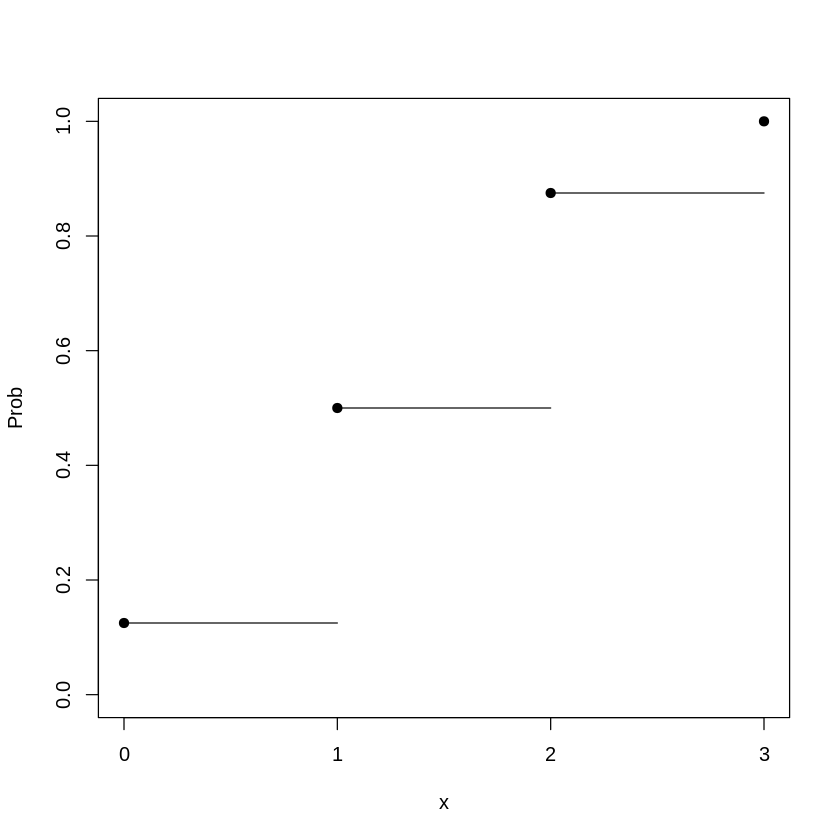

In [22]:
plot(0:3, pbinom(0:3, size = 3, prob = 0.5), 
     ylim = c(0,1), 
     xaxt='n', pch = 19,
     ylab = 'Prob', xlab = 'x')
axis(side = 1, at = 0:3, labels = 0:3)
segments(x0 = c(0, 1, 2), y0 = c(0.125, 0.5, 0.875), 
         x1 = c(1, 2, 3), y1 = c(0.125, 0.5, 0.875))

Esse gráfico às vezes é chamado de gráfico de etapas. Assim que você atinge um ponto no eixo x, você **“passa”** para a próxima probabilidade. `A probabilidade de 0 ou menos é 0,125`. Daí a linha reta de 0 a 1. Em 1, aumentamos para 0,5, porque a probabilidade de 1 ou menos é 0,5. E assim por diante. Em 3, temos um ponto em 1. A probabilidade de 3 ou menos é certeza. Temos a garantia de obter 3 ou menos sucessos em nossa distribuição binomial.

Agora vamos demonstrar o que fizemos acima com uma distribuição contínua. Para mantê-lo relativamente simples, usaremos a distribuição normal padrão, que tem uma média de 0 e um desvio padrão de 1. Ao contrário do nosso exemplo de lançamento de moeda acima, que pode ser entendido precisamente com uma distribuição binomial, não há **"fora do -shelf”** exemplo da vida real que mapeia perfeitamente para uma distribuição normal padrão. Portanto, teremos que usar nossa imaginação.

Vamos primeiro desenhar a distribuição usando a curvefunção. O primeiro argumento `dnorm(x)`, é basicamente a fórmula matemática que traça o limite. Observe o **“d”** antes de **“norma”**; esta é a função de **“densidade”**. _Os padrões da dnormfunção são média = 0 e desvio padrão = 1. Os argumentos frome todizem que desenhe esta curva usando valores de x variando de -3 a 3._

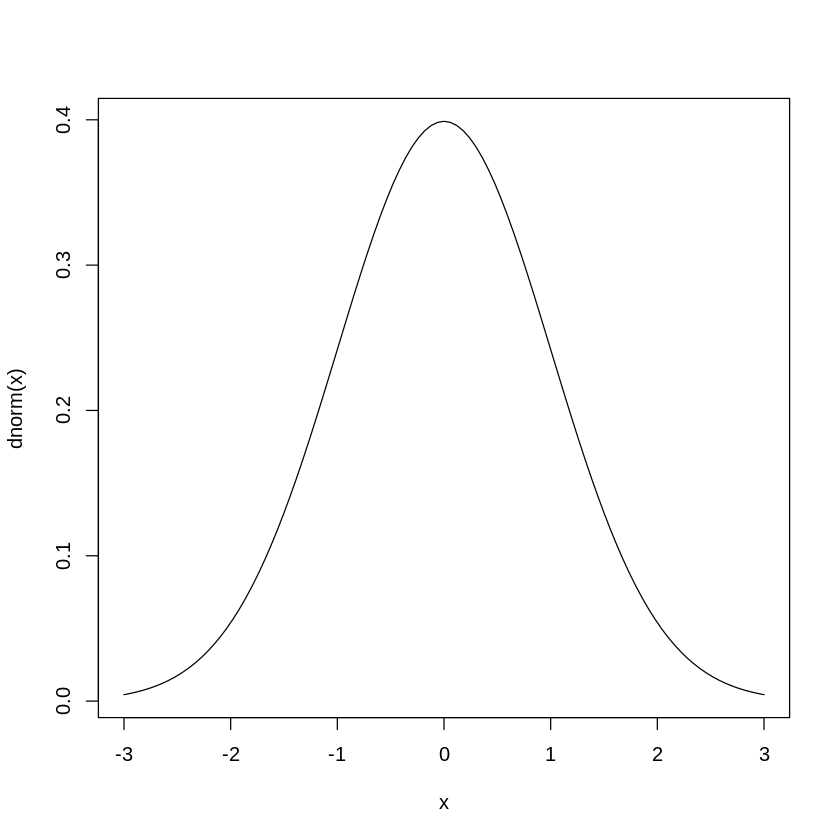

In [23]:
curve(dnorm(x), from = -3, to = 3)

A curva é uma linha suave, o que significa que é uma distribuição de probabilidade para todos os números reais. A área sob a curva é 1 porque é uma distribuição de probabilidade.

Imagine chegar a essa distribuição e tirar um número. `Qual é a probabilidade de obter 1,134523768923?` **É essencialmente 0**. 
_Por quê? Porque há `1∞ chance` de selecioná-lo._ Porque é ∞ no denominador? Porque existe um número infinito de possibilidades. Se isso parece confuso, imagine apenas aproximar-se do eixo x com resolução cada vez mais precisa, com decimais estendendo-se até o horizonte. Isso significa que os valores do eixo y não representam probabilidade, mas sim “densidade”. A densidade é essencialmente a probabilidade de um pequeno intervalo de valores dividido por esse intervalo. Se isso também parece confuso, tudo bem. Apenas lembre-se de que não usamos distribuições normais (ou qualquer distribuição contínua) para obter probabilidades exatas. Nós os usamos para obter probabilidades para uma gama de valores .

Por exemplo, qual é a probabilidade de que x seja menor ou igual a -1? Para isso, podemos usar a pnormfunção, que é a função de distribuição cumulativa para a distribuição normal.

In [39]:
pnorm(-1)
## [1] 0.1586553

[1] 0.1586553

O pacote de mosaico fornece a função `plotDist` útil para visualizar rapidamente essa probabilidade. Colocando `mosaic::` antes da função, podemos chamar a função sem carregar o pacote do mosaico. O argumento `groups`diz para criar duas regiões: **uma para menos de -1 e outra para maior que -1**. O argumento `type='h'` diz desenhe um gráfico **“semelhante a um histograma”**. As duas cores são para as respectivas regiões. Obviamente, `“norma”` significa desenhar uma distribuição normal. _Novamente, o padrão é a média 0 e o desvio padrão 1._

In [8]:
# instalando o pacote "mosaic"
install.packages('mosaic')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘lazyeval’, ‘ggforce’, ‘labelled’, ‘plyr’, ‘png’, ‘jpeg’, ‘crosstalk’, ‘htmlwidgets’, ‘raster’, ‘sp’, ‘viridis’, ‘leaflet.providers’, ‘ggformula’, ‘mosaicData’, ‘mosaicCore’, ‘ggstance’, ‘ggridges’, ‘ggrepel’, ‘latticeExtra’, ‘ggdendro’, ‘gridExtra’, ‘leaflet’




Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2



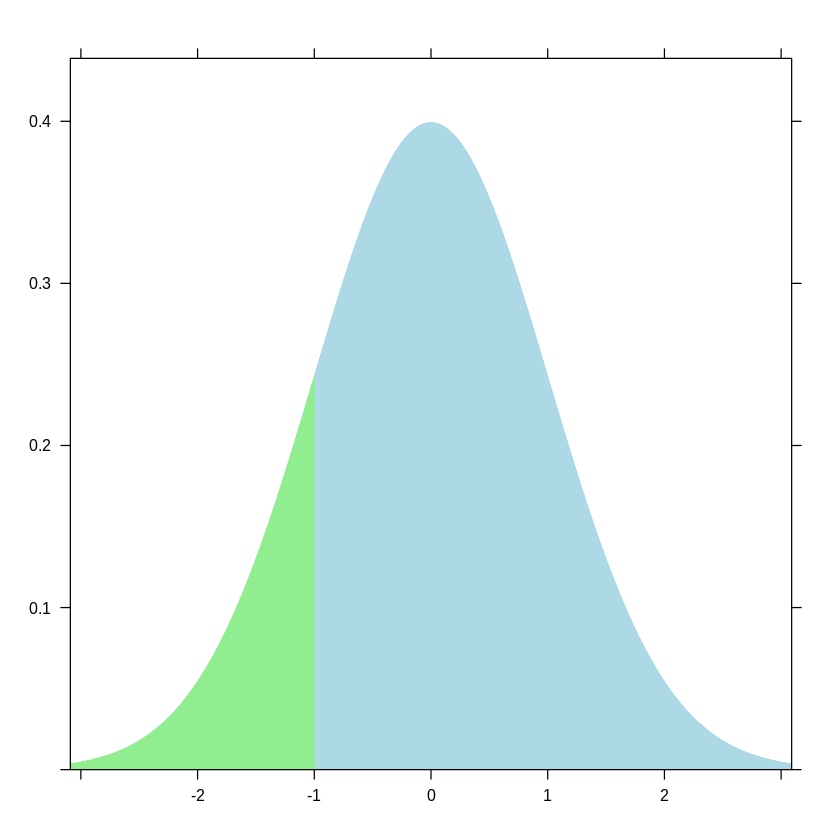

In [9]:
mosaic::plotDist('norm', groups = x < -1, 
                 type='h', col = c('lightblue', 'lightgreen'))

Este gráfico realmente mostra a probabilidade cumulativa. `A região azul é igual a 0,1586553`, a probabilidade de extrairmos um valor de -1 ou menos dessa distribuição. Lembre-se de que usamos a função de distribuição cumulativa para obter esse valor. Para visualizar todas as probabilidades cumulativas para a distribuição normal padrão, podemos novamente usar a curvefunção, mas desta vez com pnorm.

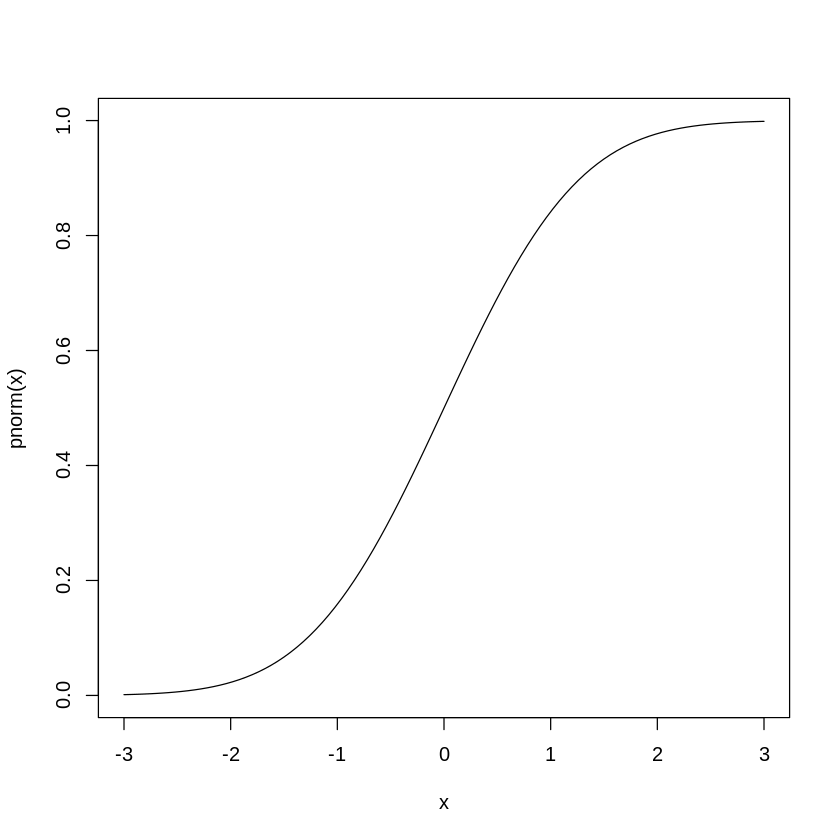

In [10]:
curve(pnorm(x), from = -3, to = 3)

Se olharmos para `-1 no eixo x` e irmos direto para a linha, e então irmos diretamente para a esquerda para o `eixo x, ele deve pousar em 0,1586553`. 
Podemos adicionar isso ao gráfico usando `segments`:

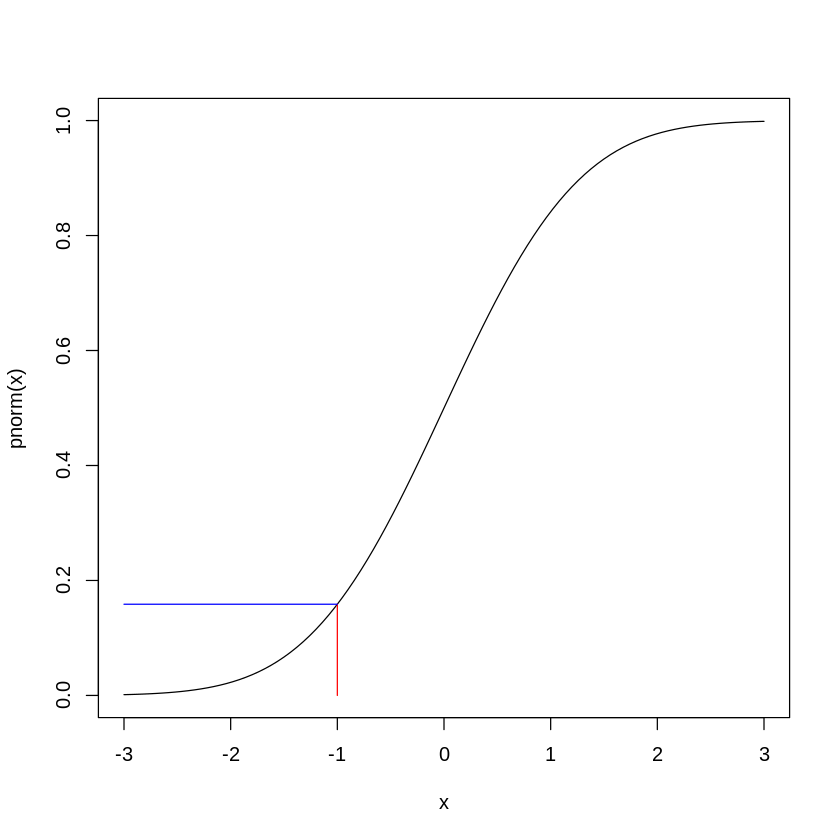

In [11]:
curve(pnorm(x), from = -3, to = 3)
segments(x0 = -1, y0 = 0, 
         x1 = -1, y1 = pnorm(-1), col = 'red')
segments(x0 = -1, y0 = pnorm(-1), 
         x1 = -3, y1 = pnorm(-1), col = 'blue')

Novamente, esta é uma linha suave porque estamos lidando com um número infinito de valores reais.

**Funções de distribuição cumulativa empírica**

Agora que entendemos as distribuições cumulativas, vamos explorar as distribuições cumulativas empíricas.

_`“Empírico” significa que estamos preocupados com observações em vez de teoria.` 

As distribuições cumulativas que exploramos acima foram baseadas na teoria. Usamos as distribuições cumulativas binomial e normal, respectivamente, para calcular as probabilidades e visualizar a distribuição. Na vida real, entretanto, os dados que coletamos ou observamos não vêm de uma distribuição teórica. Temos que usar os próprios dados para criar uma distribuição cumulativa.

Podemos fazer isso em **R** com a função `ecdf`. `ECDF` do inglês `Empirical Cumulative Distribution Function”` que significa **“Função de distribuição cumulativa empírica”**.

Observe a última palavra: `“Função”`. A `ecdf` retorna uma função . Assim como `pbinom` e `pnorm` eram as funções de distribuição cumulativa para nossos dados teóricos, **ecdf** cria uma função de distribuição cumulativa para nossos dados observados. Vamos tentar fazer isso com o conjunto de dados de rocha que vem com R.

O conjunto de dados de rocha contém medições em 48 amostras de rocha de um reservatório de petróleo. Ele contém 4 variáveis: área, peri, forma e perm. Vamos trabalhar com a variável area, que é a área total dos poros em cada amostra.

_As ecdf funções funcionam em vetores numéricos, que geralmente são colunas de números em um quadro de dados._ Abaixo, fornecemos a coluna de área do quadro de dados da rocha.

In [12]:
print(ecdf(rock$area))
## Empirical CDF 
## Call: ecdf(rock$area)
##  x[1:47] =   1016,   1468,   1651,  ...,  11878,  12212

Empirical CDF 
Call: ecdf(rock$area)
 x[1:47] =   1016,   1468,   1651,  ...,  11878,  12212


Observe que a saída não é tão útil. 
Isso ocorre porque a **ecdf** retorna uma função . Precisamos atribuir o resultado a um nome para que possamos criar nossa função `ECDF`. Vamos usar `Fn`.

In [13]:
Fn <- ecdf(rock$area)

Agora você tem uma função de distribuição cumulativa personalizada que pode usar com seus dados. 

Por exemplo, podemos criar um gráfico de etapas para visualizar a distribuição cumulativa.

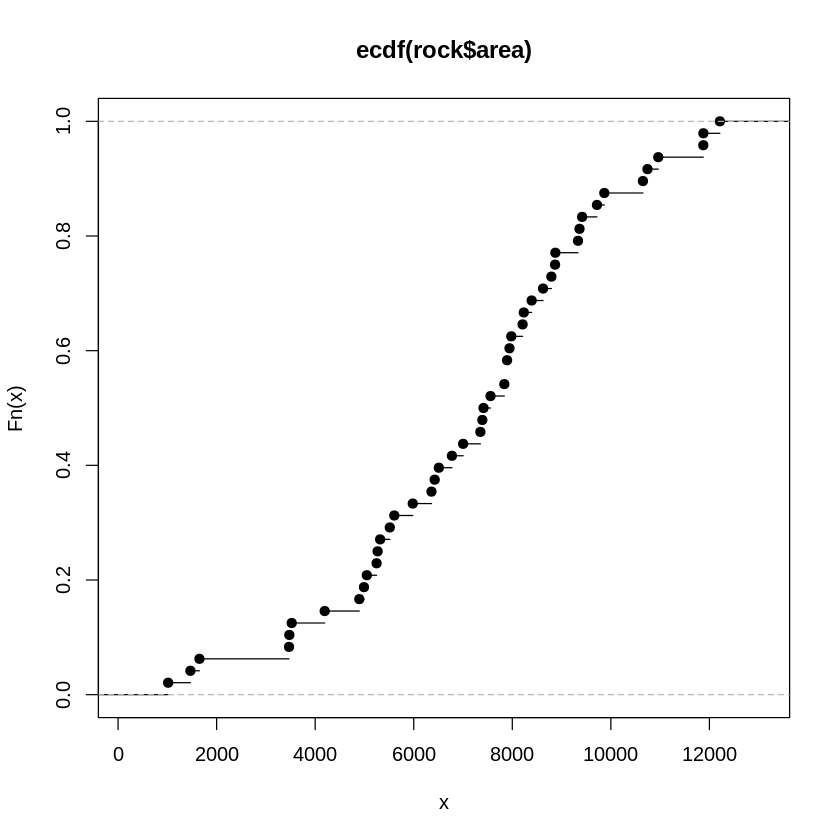

In [14]:
plot(Fn)

Olhando para o gráfico, _podemos ver que a probabilidade estimada de que a área de uma amostra seja menor ou igual a 8000 é cerca de 0,6_. 

Mas não precisamos depender de olhar para o gráfico. **Temos uma função!** Podemos usá-lo para obter uma estimativa mais precisa. 

Basta dar a ele um número dentro do intervalo do eixo x e ele retornará a probabilidade cumulativa.

In [15]:
# Prob area less than or equal to 8000
# Área de Prob menor ou igual a 8000 
Fn(8000)
## [1] 0.625

[1] 0.625

Podemos usar a função com mais de um valor. Por exemplo, podemos obter probabilidades estimadas de que a área seja menor ou igual a 4.000, 6.000 e 8.000.

In [16]:
Fn(c(4000, 6000, 8000))
## [1] 0.1250000 0.3333333 0.6250000

[1] 0.1250000 0.3333333 0.6250000

Também existe o método `summary` para funções **ECDF**. Ele retorna um resumo dos valores exclusivos dos dados observados. Observe que é semelhante ao método de resumo tradicional para vetores numéricos, mas o resultado é um pouco diferente, pois está resumindo os valores exclusivos em vez de todos os valores.

In [17]:
summary(Fn)
## Empirical CDF:     47 unique values with summary
##    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
##    1016    5292    7416    7173    8871   12212

Empirical CDF:	  47 unique values with summary
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1016    5292    7416    7173    8871   12212 

In [18]:
summary(rock$area)
##    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
##    1016    5305    7487    7188    8870   12212

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1016    5305    7487    7188    8870   12212 

Finalmente, se quisermos, podemos sobrepor uma distribuição cumulativa teórica sobre o ECDF. Isso pode nos ajudar a avaliar se podemos ou não assumir que nossos dados podem ser modelados com uma distribuição teórica particular. 

Por exemplo, nossos dados poderiam ser considerados como tendo sido amostrados de uma distribuição Normal? Abaixo, plotamos a função degrau e, em seguida, sobrepomos uma distribuição normal cumulativa usando a média e o desvio padrão de nossos dados observados.

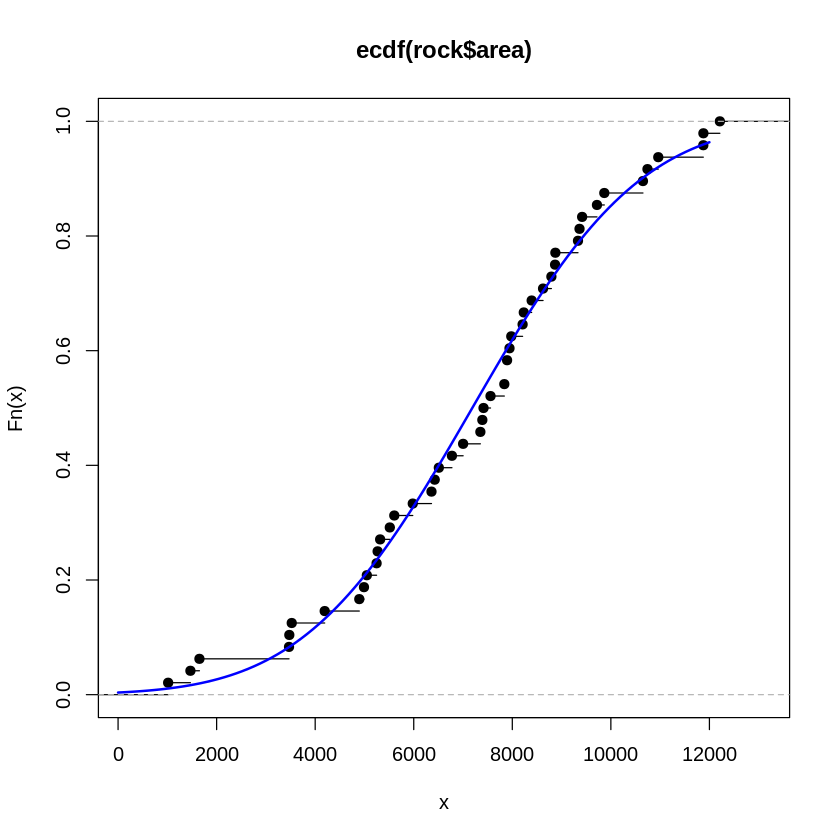

In [19]:
plot(ecdf(rock$area))
curve(pnorm(x, mean(rock$area), sd(rock$area)), 
      from = 0, to = 12000, add = TRUE, col='blue', lwd = 2)

As linhas parecem se sobrepor um pouco, sugerindo que os dados podem ser aproximados com uma distribuição normal. Também podemos comparar as estimativas de nosso ECDF com um CDF teórico. Vimos que a probabilidade dessa área ser menor ou igual a 8000 é cerca de 0,625. Como isso se compara a uma distribuição cumulativa normal com uma média e um desvio padrão de rock$area?

In [20]:
pnorm(8000, mean = mean(rock$area), sd = sd(rock$area))
## [1] 0.6189223

[1] 0.6189223

Isso é muito perto!

Outra avaliação gráfica é o `gráfico QQ`, que também pode ser feito facilmente em R usando as funções `qqnorm``e `qqline`. A ideia é que se os pontos caírem ao longo da linha diagonal, então temos boas evidências de que os dados são plausivelmente normais. 

Novamente, este gráfico revela que os dados parecem que podem ser bem aproximados com uma distribuição normal. (Para obter mais informações sobre gráficos QQ, consulte nosso artigo, [Compreendendo os gráficos QQ](https://data.library.virginia.edu/understanding-q-q-plots/))

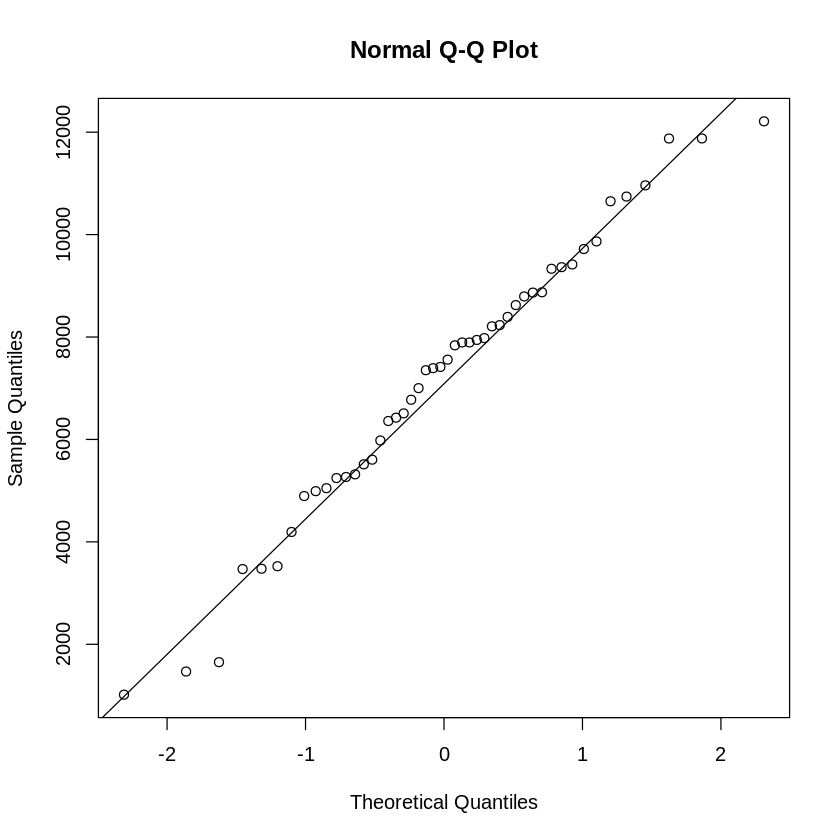

In [21]:
qqnorm(rock$area)
qqline(rock$area)

Para dúvidas ou esclarecimentos sobre este artigo, entre em contato com a Biblioteca UVA StatLab: statlab@virginia.edu

Veja toda a coleção de artigos da UVA Library StatLab.

Clay Ford
Consultor de Pesquisa Estatística
Biblioteca da Universidade da Virgínia
, 9 de julho de 2020

# **Vamos para mais um exemplo!**

**Função distribuição empírica em R**

In [37]:
# instanciado manualmente os dados
x <- c(126, 120, 117, 132, 146, 192, 180, 161, 156,
        135, 129, 115, 170, 139, 123)

In [38]:
# contabilizando o número de observações registrados na variável "x"
cat('n = ', length(x))

n =  15

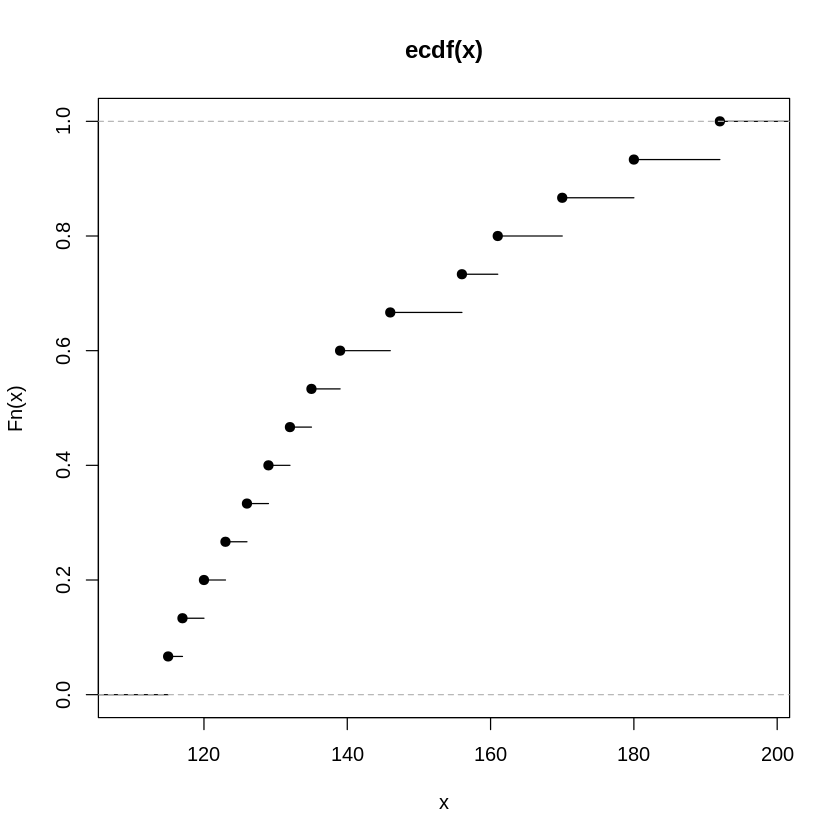

In [39]:
# plotando o gráfico da função ecdf
plot(ecdf(x))

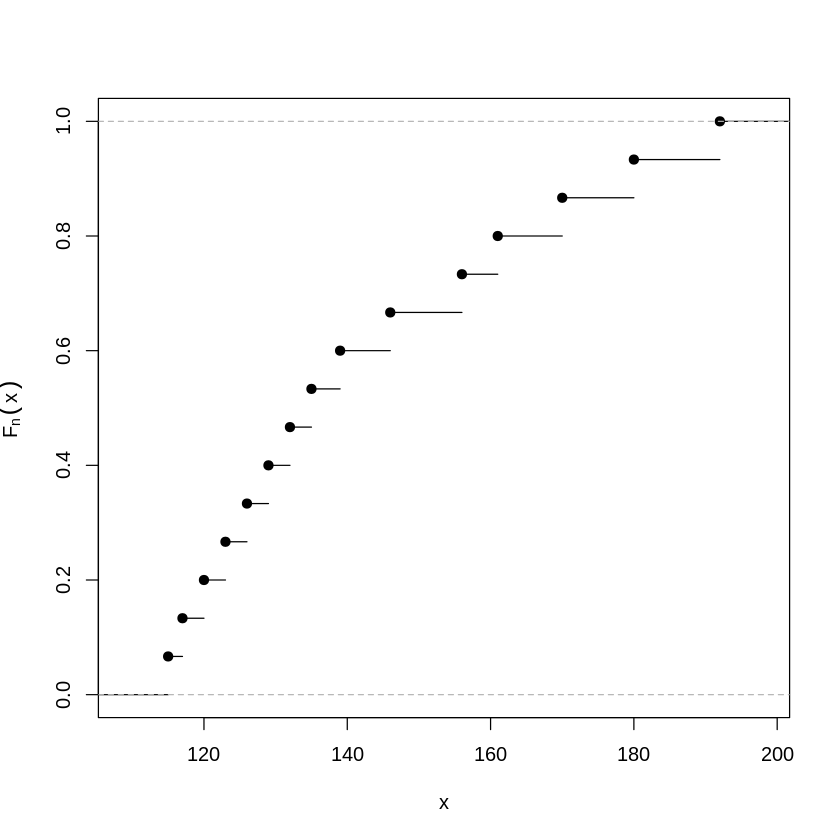

In [42]:
# mudadndo alguns argumentos
plot(ecdf(x), main = '', ylab = expression(F[n](x)))

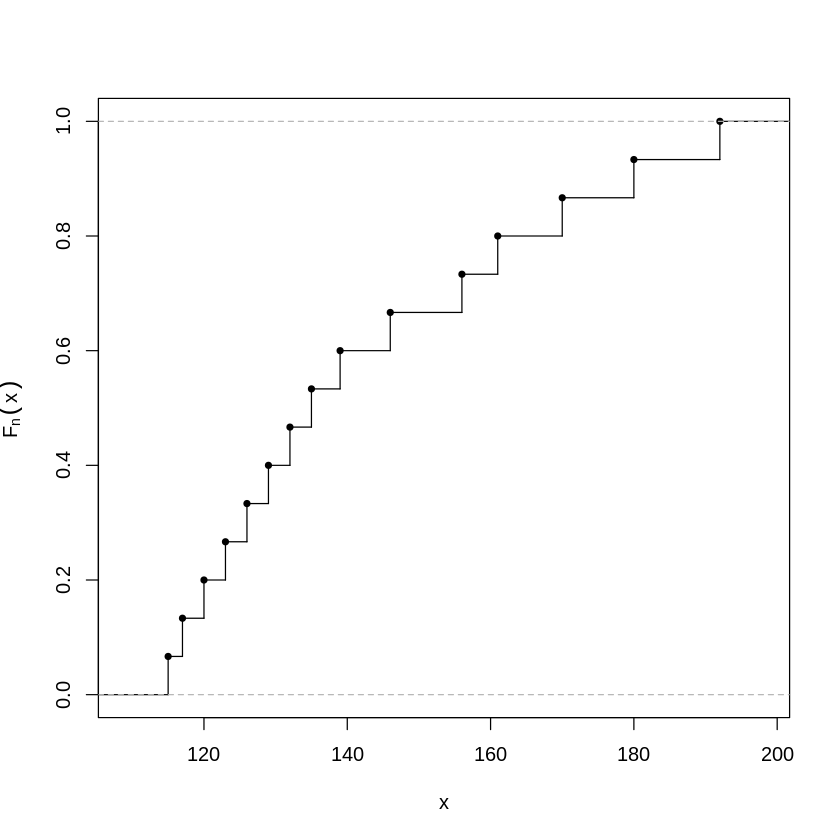

In [43]:
plot(ecdf(x), main = '', ylab = expression(F[n] (x)),
                    pch = 20, verticals = TRUE)

In [44]:
# função Fn(x)
Fn <- ecdf(x)

O gráfico de _Fn(x)_ pode ser traçado usando a função `Fn`:

[1] 115 117 120 123 126 129 132 135 139 146 156 161 170 180 192

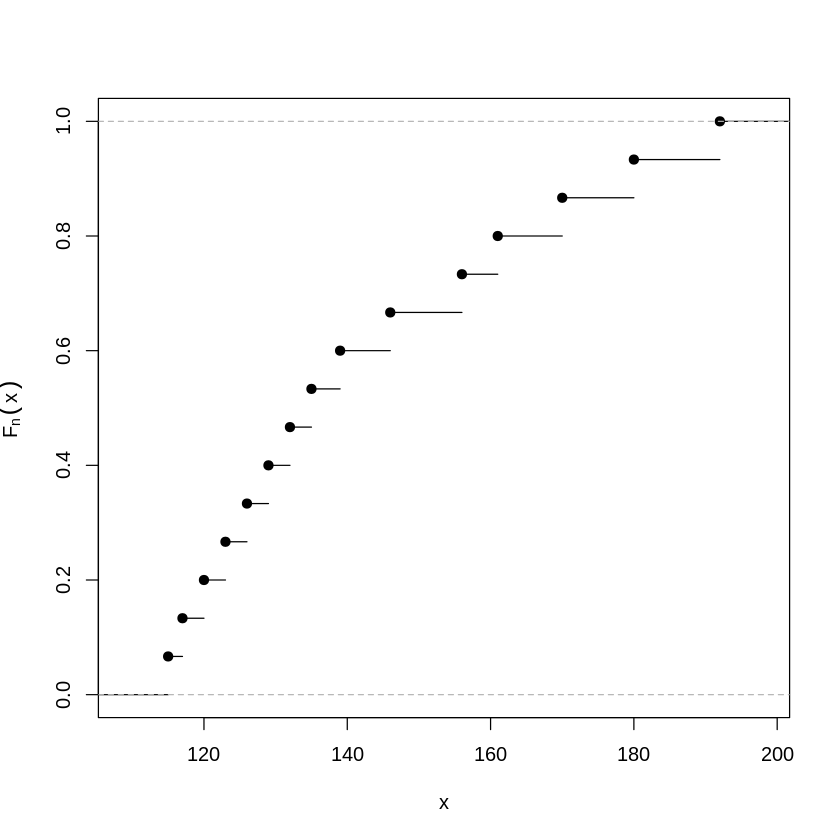

In [46]:
plot(Fn, main = '', ylab = expression(F[n](x),
        pch = 20))

knots(Fn) # valores de x sem repetições em ordem crescente

In [51]:
# função Fn calculda em x
cbind(x, Fn(x))

x,
126,0.33333333
120,0.20000000
117,0.13333333
132,0.46666667
146,0.66666667
192,1.00000000
180,0.93333333
161,0.80000000
156,0.73333333
135,0.53333333


In [52]:
# função Fn calculda em x após ordenação
cbind(knots(Fn), Fn(knots(Fn)))

115,0.06666667
117,0.13333333
120,0.20000000
123,0.26666667
126,0.33333333
129,0.40000000
132,0.46666667
135,0.53333333
139,0.60000000
146,0.66666667
156,0.73333333


In [54]:
# função Fn calculada em alguns pontos
Fn(c(-5, 118, 160, 200))

[1] 0.0000000 0.1333333 0.7333333 1.0000000

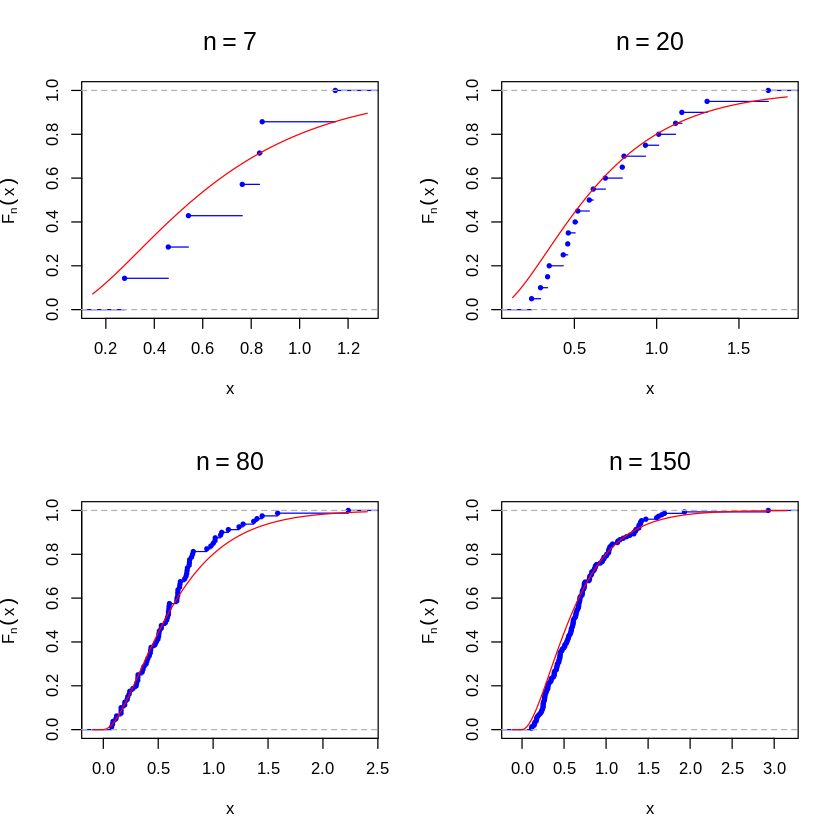

In [56]:
# exemplo com diferentes tamanhos de amostra
n <- c(7, 20, 80, 150)

par(mfrow = c(2, 2))
for (tamanho in n) {
      dados <- rgamma(tamanho, shape = 2, rate = 3)
      plot(ecdf(dados), main = bquote(n == .(tamanho)), col = 'blue',
          ylab = expression(F[n] (x)), pch = 20, cex.main = 1.5)

      curve(pgamma(x, shape = 2, rate = 3), add = TRUE, col ='red')

}

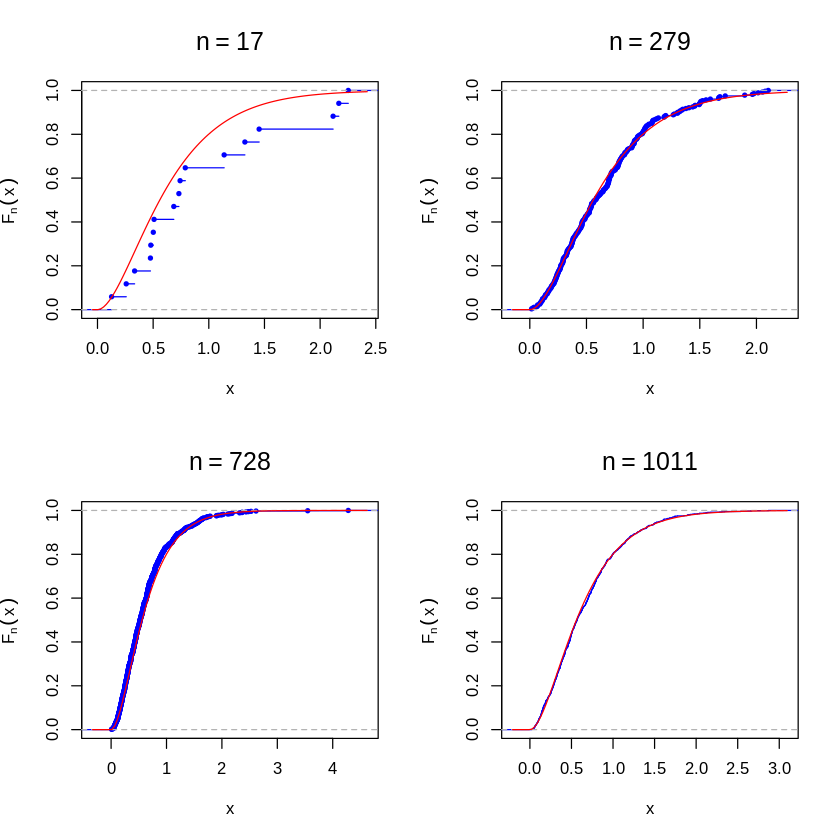

In [71]:
# outro exemplo com diferentes tamanhos de amostra
n <- c(17, 279, 728, 1011)

par(mfrow = c(2, 2))
for (tamanho in n) {
      dados <- rgamma(tamanho, shape = 2, rate = 3)
      plot(ecdf(dados), main = bquote(n == .(tamanho)), col = 'blue',
          ylab = expression(F[n] (x)), pch = 20, cex.main = 1.5)

      curve(pgamma(x, shape = 2, rate = 3), add = TRUE, col ='red')

}

- Material de referência:
 - http://wiki.icmc.usp.br/images/0/06/Ecdf2015.pdf
 - https://www.ime.usp.br/~chang/home/mae116/MAE219-Estat%EDstica%20Economia-2019/mae219-aula%2011.pdf